In [1]:
# import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, linear_model, datasets
# from sklearn.cross_validation import cross_val_score
%matplotlib inline

In [2]:
# new dataset, handwritten digits!
digits = datasets.load_digits()
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [3]:
len(digits.data)      # 1,797 observations

1797

In [4]:
len(digits.data[0])   # 8 x 8 pixel image

64

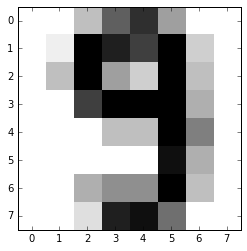

In [5]:
# the number 9
plt.imshow(digits.images[-5], cmap=plt.cm.gray_r, interpolation='nearest')

In [6]:
digits.target[-5]# 9

9

In [7]:
# get X and y
digits_X, digits_y = digits.data, digits.target

In [8]:
# from the previous notebook, we found these parameters to yield a cross-val score of 98%
svc = svm.SVC(C=10.0, gamma=0.001)

In [9]:
# TTS
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits_X, digits_y, test_size=0.33, random_state=25)

In [10]:
svc.fit(X_train, y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
y_pred = svc.predict(X_test)

In [12]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.98821548821548821

In [13]:
import pandas as pd
results = pd.DataFrame(svc.predict(X_test), columns=['predicted'])
results['true'] = y_test

In [14]:
results.head()

,predicted,true
0,4,4
1,0,0
2,2,2
3,4,4
4,0,0


In [15]:
# what indexes are causing problems
row_ids = results[results['predicted'] != results.true].index
print row_ids

Int64Index([92, 101, 116, 304, 322, 420, 473], dtype='int64')


In [50]:
# make a function to print those out
def print_number(index):
    plt.imshow(digits.images[index], cmap=plt.cm.gray_r, interpolation='nearest'),"\n", "The model guessed this was:", results['predicted'].iloc[index], "\n", "This was meant to be:", results['true'].iloc[index],
    plt.show()
    print "The model guessed this was:", results['predicted'].iloc[index], "\n", "This was meant to be:", results['true'].iloc[index], "\n", "\n","\n"

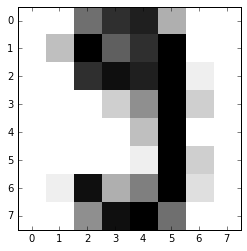

The model guessed this was: 9 
This was meant to be: 5 





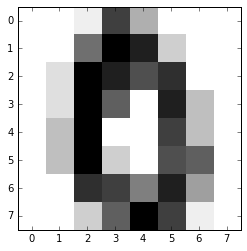

The model guessed this was: 8 
This was meant to be: 9 





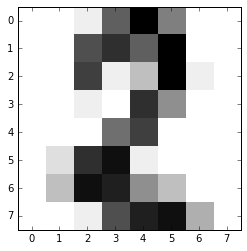

The model guessed this was: 8 
This was meant to be: 6 





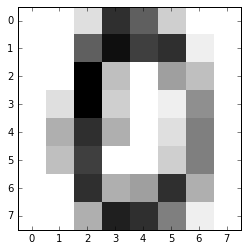

The model guessed this was: 8 
This was meant to be: 9 





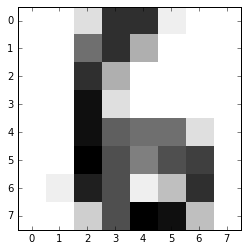

The model guessed this was: 9 
This was meant to be: 7 





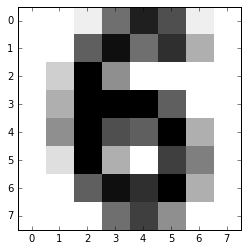

The model guessed this was: 1 
This was meant to be: 8 





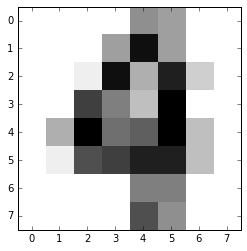

The model guessed this was: 5 
This was meant to be: 3 





In [51]:
for value in row_ids:
    print_number(value)